# 清洗与分析数据 We rate dogs

## 项目简介

本项目整理 (以及分析和可视化) 的数据集是推特用户 @dog_rates 的档案, 推特昵称为 WeRateDogs。WeRateDogs 是一个推特主，他以诙谐幽默的方式对人们的宠物狗评分。这些评分通常以 10 作为分母。但是分子则一般大于 10：11/10、12/10、13/10 等等。

## 数据

### 推特档案数据

WeRateDogs 的推特档案包括 5000 多条推特的基本信息，但并不包括所有内容。不过档案中有一列包含每个推特的文本，用这一列数据提取评分、狗的名字和“地位”（即 doggo、floofer、pupper 和 puppo）——这使数据得以“完善”。在这 5000 多条中，只筛选出了 2356 条包含评分的推特数据，这些数据需要进一步评估和清理。

### 通过Twitter API 获取的附加数据

回到基础的推特档案：转发数（retweet count）和喜爱数（favorite count）是两个遗漏的列。幸运的是，从推特 API 中，任何人都可以收集到这些数据。其实，"任何人" 只是能获取最多 3000 条的最近推特数据。但是因为本项目拥有 WeRateDogs 推特档案和其中的推特 ID，因此可以收集到这其中所有的 5000 多条推特。我将查询推特 API 来收集这些有价值的数据。返回的 Twitter 数据文件为 txt 格式，每一行为一条独立的 twitter 信息，格式为 JSON。

### 图像预测文件

还有一件更酷的事情：我通过一个可以对狗狗种类进行分类的[神经网络](https://www.youtube.com/watch?v=2-Ol7ZB0MmU)，运行这份推特档案中的所有图像。获取的结果：一份图像预测结果表格，其中包含了预测结果的前三名，推特 ID，图像 url 以及最可信的预测结果对应的图像编号（由于推特最多包含 4 个图片，所以编号为 1 到 4）。

## 数据收集

收集下面描述的三份数据：<br>
- 1.WeRateDogs 推特档案。
- 2.推特图片预测，即根据神经网络，出现在每个推特中狗的品种 (或其他物体、动物等)。
- 3.每条推特的数据，至少要包含转发数（retweet_count）和喜欢数（favorite_count），以及任何你觉得有趣的额外数据。

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from pandas import DataFrame
import requests
import time
import json

In [2]:
#读取WeRateDogs 推特档案twitter-archive-enhanced
twitter = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
#获取推特图片预测image-predictions
url = 'https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv'
file_name = 'image-predictions.tsv'
r = requests.get(url)
with open(file_name, 'w') as file:
    file.write(r.text)

In [4]:
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [5]:
#获取推特额外数据
tweet_list = []
with open("tweet_json.txt","r") as f:
    for row in f:  
        json_dict = json.loads(row)
        to_append={
                    'tweet_id':json_dict['id'],
                    'retweet_count':json_dict['retweet_count'],
                    'favorite_count':json_dict['favorite_count']
                  }
        tweet_list.append(to_append)
tweet_extra=pd.DataFrame(tweet_list,columns=['tweet_id','retweet_count','favorite_count'])

此处twitter-archive-enhanced,image_predictions,tweet_json三个数据集都已收集完毕,tweet_json选择需要的数据形成tweet_extra数据框

## 数据评估

### 目测评估

In [6]:
twitter

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
image_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
tweet_extra

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492
1,892177421306343426,6480,33786
2,891815181378084864,4301,25445
3,891689557279858688,8925,42863
4,891327558926688256,9721,41016
5,891087950875897856,3240,20548
6,890971913173991426,2142,12053
7,890729181411237888,19548,66596
8,890609185150312448,4403,28187
9,890240255349198849,7684,32467


### 编程评估

In [10]:
twitter.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [11]:
twitter[twitter.tweet_id.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [12]:
twitter.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
twitter.timestamp

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
5       2017-07-29 00:08:17 +0000
6       2017-07-28 16:27:12 +0000
7       2017-07-28 00:22:40 +0000
8       2017-07-27 16:25:51 +0000
9       2017-07-26 15:59:51 +0000
10      2017-07-26 00:31:25 +0000
11      2017-07-25 16:11:53 +0000
12      2017-07-25 01:55:32 +0000
13      2017-07-25 00:10:02 +0000
14      2017-07-24 17:02:04 +0000
15      2017-07-24 00:19:32 +0000
16      2017-07-23 00:22:39 +0000
17      2017-07-22 16:56:37 +0000
18      2017-07-22 00:23:06 +0000
19      2017-07-21 01:02:36 +0000
20      2017-07-20 16:49:33 +0000
21      2017-07-19 16:06:48 +0000
22      2017-07-19 03:39:09 +0000
23      2017-07-19 00:47:34 +0000
24      2017-07-18 16:08:03 +0000
25      2017-07-18 00:07:08 +0000
26      2017-07-17 16:17:36 +0000
27      2017-07-16 23:58:41 +0000
28      2017-07-16 20:14:00 +0000
29      2017-0

In [14]:
twitter[twitter.rating_denominator != 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
342,832088576586297345,8.320875e+17,3.058208e+07,2017-02-16 04:45:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@docmisterio account started on 11/15/15,NaN,NaN,NaN,NaN,11,15,None,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
784,775096608509886464,NaN,NaN,2016-09-11 22:20:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: After so many requests, this is...",7.403732e+17,4.196984e+09,2016-06-08 02:41:38 +0000,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None
1068,740373189193256964,NaN,NaN,2016-06-08 02:41:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...","After so many requests, this is Bretagne. She ...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/740373189...,9,11,None,None,None,None,None
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/731156023...,204,170,this,None,None,None,None
1165,722974582966214656,NaN,NaN,2016-04-21 02:25:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Happy 4/20 from the squad! 13/10 for all https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/722974582...,4,20,None,None,None,None,None
1202,716439118184652801,NaN,NaN,2016-04-03 01:36:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bluebert. He just saw that both #Final...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,None,None,None,None


In [15]:
twitter.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [16]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [17]:
image_predictions[image_predictions.tweet_id.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [18]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [19]:
tweet_extra.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [20]:
tweet_extra[tweet_extra.tweet_id.duplicated()]

,tweet_id,retweet_count,favorite_count


In [21]:
tweet_extra.describe()

,tweet_id,retweet_count,favorite_count
count,2.352000e+03,2352.000000,2352.000000
mean,7.425913e+17,3134.932398,8109.198980
std,6.846210e+16,5237.846296,11980.795669
min,6.660209e+17,0.000000,0.000000
25%,6.783949e+17,618.000000,1417.000000
50%,7.193536e+17,1456.500000,3596.500000
75%,7.991219e+17,3628.750000,10118.000000
max,8.924206e+17,79116.000000,132318.000000


#### 质量
##### `twitter` 表格
- 存在转发的推特需要删除
- in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp类型不对
- in_reply_to_status_id、in_reply_to_user_id、expanded_urls信息缺省
- timestamp类型错误
- name有的条目提取错误，且有缺省值
- doggo、floofer、pupper、puppo有缺省值,有的条目并列存在
- rating_denominator有的不是10
- rating_numerator存在异常值
- 无图片的twitter需要删除


##### `image_predictions` 表格
- p1,p2,p3中狗名字格式不一致，首字母要大写 


##### `tweet_extra` 表格
- 缺少记录，暂时无法修改


#### 清洁度
- `twitter` 表格中的doggo、floofer、pupper、puppo应该用狗的地位stage来表示
- `tweet_extra` 表格中的favorite_count和retweet_count加入twitter表格中
- `image_predictions` 表也应该合并到 twitter 表格中，并且 twitter 表格去掉没有image_predictions的部分

## 清理

In [22]:
twitter_clean = twitter.copy()
image_predictions_clean = image_predictions.copy()
tweet_extra_clean = tweet_extra.copy()

### 缺失数据

#### `twitter`：name有的条目提取错误，且有缺省值

##### 定义
用str.extract()和正则表达式重新提取name。

##### 代码

In [23]:
twitter_clean.name =twitter_clean.text.str.extract('(?:This is|Meet|name is|Say hello to|named) ([A-Z][a-z]{1,12})', expand=False)

##### 测试

In [24]:
twitter_clean.name.sample(20)

474         Comet
1255          NaN
366           Gus
582           Doc
808         Davey
1841          NaN
1738          NaN
2187         Chaz
570           NaN
848          Juno
1011        Linus
1952    Shnuggles
998           NaN
69         Steven
1550          NaN
179           NaN
347          Kuyu
1622          NaN
360           Mia
854        Gromit
Name: name, dtype: object

### 清洁度

#### `twitter`：doggo、floofer、pupper、puppo应该用狗的地位stage来表示，doggo、floofer、pupper、puppo有缺省值，有的条目并列存在。

##### 定义
doggo、floofer、pupper、puppo应该用狗的地位stage来表示，删除这四列，并用str.findall函数和正则表达式重新提取“stage”信息，再用apply函数针对stage这一列做出修改，将未提取出来的修改为 NaN，有多重地位的将这些地位信息用逗号连接。

##### 代码

In [25]:
twitter_clean.drop(['doggo','floofer','pupper','puppo'], axis=1, inplace=True)
twitter_clean['stage'] = twitter_clean.text.str.findall('(doggo|floof|pupper|puppo)')

def cor_stage(stage):
    return ','.join(set(stage))

twitter_clean.stage = twitter_clean.stage.apply(cor_stage)

In [37]:
twitter_clean.stage.replace('',np.nan, inplace=True)

##### 测试

In [38]:
twitter_clean.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage
394,825829644528148480,NaN,NaN,2017-01-29 22:15:05 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Toby. He just found out you only prete...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825829644...,12,10,Toby,NaN
856,764259802650378240,NaN,NaN,2016-08-13 00:38:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kota and her son Benedict. She doesn't...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/764259802...,10,10,Kota,NaN
373,828376505180889089,NaN,NaN,2017-02-05 22:55:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Beebop. Her name means ""Good Dog"" in r...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828376505...,13,10,Beebop,NaN
1052,742528092657332225,NaN,NaN,2016-06-14 01:24:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Maxaroni. He's pumped as hell for the ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/742528092...,10,10,Maxaroni,NaN
1300,707693576495472641,NaN,NaN,2016-03-09 22:24:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jiminus. He's in a tub for some reason...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,NaN


In [39]:
twitter_clean.stage.value_counts()

pupper          262
doggo            86
puppo            35
floof            23
pupper,doggo     10
puppo,doggo       2
Name: stage, dtype: int64

#### `tweet_extra` 表格中的favorite_count和retweet_count加入twitte表格中

##### 定义
用merge函数将tweet_extra_clean表中的favorite_count和retweet_count加入twitter_clean表格

##### Code

In [42]:
twitter_clean = pd.merge(twitter_clean, tweet_extra_clean, on='tweet_id', how='inner')

##### 测试

In [43]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2352 entries, 0 to 2351
Data columns (total 16 columns):
tweet_id                      2352 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2352 non-null object
source                        2352 non-null object
text                          2352 non-null object
retweeted_status_id           177 non-null float64
retweeted_status_user_id      177 non-null float64
retweeted_status_timestamp    177 non-null object
expanded_urls                 2293 non-null object
rating_numerator              2352 non-null int64
rating_denominator            2352 non-null int64
name                          1527 non-null object
stage                         418 non-null object
retweet_count                 2352 non-null int64
favorite_count                2352 non-null int64
dtypes: float64(4), int64(5), object(7)
memory usage: 312.4+ KB


In [44]:
twitter_clean.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count
1304,707297311098011648,NaN,NaN,2016-03-08 20:09:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She can go from sweet to scary...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/707297311...,10,10,Cassie,NaN,901,3008
1227,713177543487135744,NaN,NaN,2016-03-25 01:35:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lance. Lance doesn't give a shit. 10/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/713177543...,10,10,Lance,NaN,3167,7817
783,774639387460112384,NaN,NaN,2016-09-10 16:03:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sprinkles. He's trapped in light jail....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/774639387...,10,10,Sprinkles,NaN,2000,7461
1096,735648611367784448,NaN,NaN,2016-05-26 01:47:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",*faints* 12/10 perfection in pupper form https...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/735648611...,12,10,NaN,pupper,1230,4382
703,785533386513321988,NaN,NaN,2016-10-10 17:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Dallas. Her tongue is ridiculous. 11/1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/785533386...,11,10,Dallas,NaN,2318,10146
733,780931614150983680,NaN,NaN,2016-09-28 00:46:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I want to finally rate this iconic puppo who t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/780931614...,13,10,NaN,puppo,8471,24088
2309,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,NaN,70,242
690,786963064373534720,NaN,NaN,2016-10-14 16:13:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Rory. He's got an interview in a few m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/786963064...,12,10,Rory,NaN,9272,29595
2277,667369227918143488,NaN,NaN,2015-11-19 15:49:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a neat pup. Very white. Cool shad...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667369227...,10,10,NaN,NaN,172,387
664,790337589677002753,NaN,NaN,2016-10-23 23:42:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Maggie. She can hear your cells divide. 1...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/790337589...,12,10,Maggie,NaN,2160,8696


#### - image_predictions 表也应该合并到 twitter 表格中，去掉twitter 表格中没有image_predictions的部分
#### - 无图片的twitter需要删除

##### 定义
用merge函数将image_predictions_clean合并到twitter_clean表格，how为inner

##### Code

In [45]:
twitter_clean = pd.merge(twitter_clean, image_predictions_clean, on='tweet_id', how='inner')

##### 测试

In [46]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 27 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          1420 non-null object
stage                         357 non-null object
retweet_count                 2073 non-null int64
favorite_count                2073 non-null int64
jpg_url                       2073 non-null object
img_num                       2073 non

In [47]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


### 质量

#### `twitter`：

#### - 存在转发的推特需要删除

##### 定义
我们分析的是原始数据，即不包含转发的数据，因此在twitter的retweeted_status_id不为空（转发条目）的都要删除。

##### 代码

In [48]:
twitter_clean = twitter_clean[twitter_clean.retweeted_status_id.isnull()]

##### 测试

In [49]:
twitter_clean.retweeted_status_id.notnull()

0       False
1       False
2       False
3       False
4       False
5       False
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17      False
18      False
19      False
20      False
21      False
22      False
23      False
24      False
25      False
26      False
27      False
28      False
29      False
        ...  
2043    False
2044    False
2045    False
2046    False
2047    False
2048    False
2049    False
2050    False
2051    False
2052    False
2053    False
2054    False
2055    False
2056    False
2057    False
2058    False
2059    False
2060    False
2061    False
2062    False
2063    False
2064    False
2065    False
2066    False
2067    False
2068    False
2069    False
2070    False
2071    False
2072    False
Name: retweeted_status_id, Length: 1994, dtype: bool

In [71]:
# 重置索引
twitter_clean = twitter_clean.reset_index(drop=True)

In [72]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                      1994 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     1994 non-null object
source                        1994 non-null object
text                          1994 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 1994 non-null object
rating_numerator              1994 non-null int64
rating_denominator            1994 non-null int64
name                          1373 non-null object
stage                         345 non-null object
retweet_count                 1994 non-null int64
favorite_count                1994 non-null int64
jpg_url                       1994 non-null object
img_num                       1994 non-nu

#### - in_reply_to_status_id、in_reply_to_user_id、retweeted_status_id、retweeted_status_user_id、retweeted_status_timestamp类型不对 
#### - in_reply_to_status_id、in_reply_to_user_id、expanded_urls信息缺省

##### 定义
考虑到在分析数据时不会用到这几项，此处用drop函数直接删除。 

##### Code

In [74]:
twitter_clean = twitter_clean.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','expanded_urls'],axis=1)

##### 测试

In [75]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1373 non-null object
stage                 345 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool


In [ ]:
twitter_clean.retweeted_status_id.notnull()

#### - timestamp类型错误

##### 定义
使用pd.to_datetime将timestamp转为datetime数据类型 

##### Code

In [76]:
twitter_clean.timestamp = pd.to_datetime(twitter_clean.timestamp)

##### 测试

In [77]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 21 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1373 non-null object
stage                 345 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-nu

In [78]:
twitter_clean.sample(5)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
97,869702957897576449,2017-05-30 23:51:58,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stanley. He likes road trips. Will shift ...,13,10,Stanley,NaN,6680,29014,...,1,Pembroke,0.993449,True,Cardigan,0.006325,True,Chihuahua,0.000178,True
1599,673656262056419329,2015-12-07 00:12:23,"<a href=""http://twitter.com/download/iphone"" r...",This is Albert AKA King Banana Peel. He's a ki...,10,10,Albert,pupper,265,763,...,1,bull_mastiff,0.700625,True,Rhodesian_ridgeback,0.094698,True,Brabancon_griffon,0.057559,True
1774,670093938074779648,2015-11-27 04:16:59,"<a href=""http://twitter.com/download/iphone"" r...",This is Wally. He's a Flaccid Mitochondria. Go...,9,10,Wally,NaN,363,1102,...,1,toy_poodle,0.383346,True,miniature_poodle,0.153678,True,chow,0.138543,True
1532,674999807681908736,2015-12-10 17:11:09,"<a href=""http://twitter.com/download/iphone"" r...",Ok last one of these. I may try to make some m...,13,10,NaN,NaN,1228,2417,...,1,Rottweiler,0.591829,True,Doberman,0.204544,True,black-and-tan_coonhound,0.078602,True
1447,677334615166730240,2015-12-17 03:48:51,"<a href=""http://twitter.com/download/iphone"" r...",This dog gave up mid jump. 9/10 https://t.co/K...,9,10,NaN,NaN,327,1470,...,2,Lakeland_terrier,0.859392,True,Airedale,0.067292,True,Irish_water_spaniel,0.049531,True


#### - rating_denominator有的不是10
#### - rating_numerator存在异常值

##### 定义
使用正则表达式和extract函数重新提取两项评分，再次检查异常值，进一步分析和处理。 

##### Code

In [79]:
# 重新提取评分
twitter_clean.rating_numerator = twitter_clean.text.str.extract('([0-9]{1,3}/10)', expand=False).str.split('/').str[0]
twitter_clean.rating_denominator = twitter_clean.text.str.extract('([0-9]{1,3}/10)', expand=False).str.split('/').str[1]

In [80]:
# 按照rating_denominator是否正确提取分开
twitter_error = twitter_clean[twitter_clean.rating_denominator != '10']
twitter_right = twitter_clean[twitter_clean.rating_denominator == '10']

In [81]:
# 将正确提取的rating_numerator和rating_denominator转化为int形式
twitter_right.rating_numerator = twitter_right.rating_numerator.astype(int)
twitter_right.rating_denominator = twitter_right.rating_denominator.astype(int)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [82]:
# 检查是否还会有异常值
twitter_right[twitter_right.rating_numerator > 20]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
503,786709082849828864,2016-10-13 23:23:56,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",75,10,Logan,NaN,7033,20221,...,1,Pomeranian,0.467321,True,Persian_cat,0.122978,False,chow,0.102654,True
553,778027034220126208,2016-09-20 00:24:34,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,Sophie,NaN,1867,7292,...,1,clumber,0.946718,True,cocker_spaniel,0.015950,True,Lhasa,0.006519,True
726,749981277374128128,2016-07-04 15:00:45,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,776,10,Atticus,NaN,2769,5594,...,1,bow_tie,0.533941,False,sunglasses,0.080822,False,sunglass,0.050776,False
1374,680494726643068929,2015-12-25 21:06:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have uncovered an entire battalion of ...,26,10,NaN,pupper,542,1868,...,1,kuvasz,0.438627,True,Samoyed,0.111622,True,Great_Pyrenees,0.064061,True
1718,670842764863651840,2015-11-29 05:52:33,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,420,10,NaN,NaN,9509,25673,...,1,microphone,0.096063,False,accordion,0.094075,False,drumstick,0.061113,False


In [83]:
# 查看异常值的text
twitter_clean.iloc[503].text

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [84]:
twitter_clean.iloc[553].text

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [85]:
twitter_clean.iloc[726].text

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [86]:
twitter_clean.iloc[1374].text

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [87]:
twitter_clean.iloc[1718].text

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [88]:
# 查看text可知第503，553，1374行rating_numerator的问题是提取了小数点后的值，因此需要修正
twitter_right.loc[503,'rating_numerator'] = 10
twitter_right.loc[553,'rating_numerator'] = 11
twitter_right.loc[1374,'rating_numerator'] = 11

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [89]:
# 查看text可知第726，1718行rating_numerator的问题与text相差较大，因此考虑用众数替换
twitter_right.rating_numerator.mode()

0    12
dtype: int32

In [90]:
twitter_right.loc[726,'rating_numerator'] = 12
twitter_right.loc[1718,'rating_numerator'] = 12

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [91]:
twitter_error

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
323,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,floof,3699,13476,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
385,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,Sam,NaN,1647,5904,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
662,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,NaN,2516,5297,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
848,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaN,doggo,1427,4172,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
946,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,NaN,NaN,NaN,pupper,827,3049,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
970,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,NaN,NaN,NaN,pupper,633,2513,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
988,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",NaN,NaN,NaN,NaN,716,2623,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1054,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,NaN,NaN,NaN,pupper,1023,3193,...,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
1130,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,NaN,NaN,NaN,NaN,1547,3730,...,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
1302,684225744407494656,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",NaN,NaN,NaN,pupper,239,1361,...,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True


In [92]:
# twitter_error的rating_denominator和rating_numerator为缺失值，因此需要重新抓取
twitter_error.rating_numerator = twitter_error.text.str.extract('([0-9]{1,3}/[1-9][0-9]{1,2})', expand=False).str.split('/').str[0]
twitter_error.rating_denominator = twitter_error.text.str.extract('([0-9]{1,3}/[1-9][0-9]{1,2})', expand=False).str.split('/').str[1]

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [93]:
twitter_error

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
323,820690176645140481,2017-01-15 17:52:40,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,84,70,NaN,floof,3699,13476,...,2,West_Highland_white_terrier,0.872064,True,kuvasz,0.059526,True,Samoyed,0.037400,True
385,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,Sam,NaN,1647,5904,...,1,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
662,758467244762497024,2016-07-28 01:00:57,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,165,150,NaN,NaN,2516,5297,...,1,Labrador_retriever,0.436377,True,Chihuahua,0.113956,True,American_Staffordshire_terrier,0.099689,True
848,731156023742988288,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,204,170,NaN,doggo,1427,4172,...,1,lakeside,0.501767,False,breakwater,0.051351,False,king_penguin,0.049444,False
946,713900603437621249,2016-03-27 01:29:02,"<a href=""http://twitter.com/download/iphone"" r...",Happy Saturday here's 9 puppers on a bench. 99...,99,90,NaN,pupper,827,3049,...,1,golden_retriever,0.371816,True,cocker_spaniel,0.177413,True,Irish_setter,0.092725,True
970,710658690886586372,2016-03-18 02:46:49,"<a href=""http://twitter.com/download/iphone"" r...",Here's a brigade of puppers. All look very pre...,80,80,NaN,pupper,633,2513,...,1,soft-coated_wheaten_terrier,0.948617,True,Dandie_Dinmont,0.018664,True,cairn,0.015943,True
988,709198395643068416,2016-03-14 02:04:08,"<a href=""http://twitter.com/download/iphone"" r...","From left to right:\nCletus, Jerome, Alejandro...",45,50,NaN,NaN,716,2623,...,1,borzoi,0.490783,True,wire-haired_fox_terrier,0.083513,True,English_setter,0.083184,True
1054,704054845121142784,2016-02-28 21:25:30,"<a href=""http://twitter.com/download/iphone"" r...",Here is a whole flock of puppers. 60/50 I'll ...,60,50,NaN,pupper,1023,3193,...,1,Great_Pyrenees,0.667939,True,kuvasz,0.228764,True,golden_retriever,0.043885,True
1130,697463031882764288,2016-02-10 16:51:59,"<a href=""http://twitter.com/download/iphone"" r...",Happy Wednesday here's a bucket of pups. 44/40...,44,40,NaN,NaN,1547,3730,...,1,Labrador_retriever,0.999885,True,golden_retriever,0.000098,True,pug,0.000008,True
1302,684225744407494656,2016-01-05 04:11:44,"<a href=""http://twitter.com/download/iphone"" r...","Two sneaky puppers were not initially seen, mo...",143,130,NaN,pupper,239,1361,...,2,golden_retriever,0.203249,True,Samoyed,0.067958,True,Great_Pyrenees,0.065327,True


In [94]:
# 查看rating_denominator和rating_numerator缺失的383行
twitter_clean.iloc[385].text

'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx'

In [95]:
# 将385行使用众数填充
twitter_error.loc[385,'rating_numerator'] = 12
twitter_error.loc[385,'rating_denominator'] = 10

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [96]:
# 将rating_denominator不是10转化为10
twitter_error.rating_numerator = twitter_error.rating_numerator.astype(int)
twitter_error.rating_denominator = twitter_error.rating_denominator.astype(int)
twitter_error.rating_numerator = twitter_error.rating_numerator/(twitter_error.rating_denominator/10).astype(int)
twitter_error.rating_denominator = 10
twitter_error.rating_numerator = twitter_error.rating_numerator.astype(int)

C:\Users\lenovo\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [97]:
# 使用pd.concat合并twitter_right和twitter_error生成新的twitter_clean，ignore_index='True'重建索引
twitter_clean = pd.concat([twitter_right, twitter_error], ignore_index='True')

##### 测试

In [98]:
twitter_clean.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8842,39492,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6480,33786,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4301,25445,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8925,42863,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9721,41016,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [99]:
twitter_clean.rating_numerator.describe()

count    1994.000000
mean       10.556670
std         2.177301
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [100]:
twitter_clean.rating_denominator.describe()

count    1994.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

#### - p1,p2,p3中狗的名字格式不一致，首字母要大写 


##### 定义
使用title函数，将p1,p2,p3中名字的每个字的首字母大写。 

##### Code

In [101]:
twitter_clean.p1 = twitter_clean.p1.str.title()
twitter_clean.p2 = twitter_clean.p2.str.title()
twitter_clean.p3 = twitter_clean.p3.str.title()

##### 测试

In [102]:
twitter_clean.p1

0                            Orange
1                         Chihuahua
2                         Chihuahua
3                       Paper_Towel
4                            Basset
5          Chesapeake_Bay_Retriever
6                       Appenzeller
7                        Pomeranian
8                     Irish_Terrier
9                          Pembroke
10                          Samoyed
11                   French_Bulldog
12                         Pembroke
13                   French_Bulldog
14                 Golden_Retriever
15                          Whippet
16                 Golden_Retriever
17                 Golden_Retriever
18                   Siberian_Husky
19                   French_Bulldog
20                           Basset
21                        Limousine
22                         Pembroke
23                 Mexican_Hairless
24                          Samoyed
25                        Chihuahua
26                           Kuvasz
27                      Conv

In [103]:
twitter_clean.p2

0                         Bagel
1                      Pekinese
2                      Malamute
3            Labrador_Retriever
4              English_Springer
5                 Irish_Terrier
6                 Border_Collie
7                    Eskimo_Dog
8                  Irish_Setter
9                      Cardigan
10                   Pomeranian
11           Labrador_Retriever
12                     Cardigan
13                        Boxer
14           Labrador_Retriever
15                       Borzoi
16              Tibetan_Mastiff
17           Labrador_Retriever
18                   Eskimo_Dog
19                          Pug
20                      Redbone
21                    Tow_Truck
22          Rhodesian_Ridgeback
23                     Sea_Lion
24                   Eskimo_Dog
25                  Toy_Terrier
26               Great_Pyrenees
27                   Sports_Car
28                    Chihuahua
29                   Shower_Cap
                 ...           
1964    

In [104]:
twitter_clean.p3

0                               Banana
1                             Papillon
2                               Kelpie
3                              Spatula
4          German_Short-Haired_Pointer
5                      Indian_Elephant
6                            Ice_Lolly
7                             Pembroke
8             Chesapeake_Bay_Retriever
9                            Chihuahua
10                                Chow
11                              Muzzle
12                             Basenji
13           Staffordshire_Bullterrier
14                             Redbone
15                              Saluki
16                  Labrador_Retriever
17                      English_Setter
18                            Malamute
19                        Bull_Mastiff
20                          Weimaraner
21                       Shopping_Cart
22                              Beagle
23                          Weimaraner
24           Staffordshire_Bullterrier
25                       

In [105]:
twitter_clean

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,stage,retweet_count,favorite_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,8842,39492,...,1,Orange,0.097049,False,Bagel,0.085851,False,Banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,6480,33786,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,4301,25445,...,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,8925,42863,...,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,9721,41016,...,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
5,891087950875897856,2017-07-29 00:08:17,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,13,10,NaN,NaN,3240,20548,...,1,Chesapeake_Bay_Retriever,0.425595,True,Irish_Terrier,0.116317,True,Indian_Elephant,0.076902,False
6,890971913173991426,2017-07-28 16:27:12,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,NaN,2142,12053,...,1,Appenzeller,0.341703,True,Border_Collie,0.199287,True,Ice_Lolly,0.193548,False
7,890729181411237888,2017-07-28 00:22:40,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,13,10,NaN,NaN,19548,66596,...,2,Pomeranian,0.566142,True,Eskimo_Dog,0.178406,True,Pembroke,0.076507,True
8,890609185150312448,2017-07-27 16:25:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,13,10,Zoey,NaN,4403,28187,...,1,Irish_Terrier,0.487574,True,Irish_Setter,0.193054,True,Chesapeake_Bay_Retriever,0.118184,True
9,890240255349198849,2017-07-26 15:59:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,7684,32467,...,1,Pembroke,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True


### 保存数据

In [106]:
save_file_name = 'twitter_archive_master.csv'
twitter_clean.to_csv(save_file_name, encoding='utf-8',index=False)



## 数据分析和可视化
（分析和可视化所依据的数据是建立在评估和清理的数据基础之上）




In [107]:
# 导入需要的库
import matplotlib.pyplot as plt
import seaborn as sns

### 1. favorite_count与retweet_count比较
- 分析favorite_count和retweet_count

In [108]:
twitter_clean.favorite_count.describe()

count      1994.000000
mean       8923.133400
std       12400.238808
min          81.000000
25%        1972.250000
50%        4117.000000
75%       11275.500000
max      132318.000000
Name: favorite_count, dtype: float64

In [109]:
twitter_clean.retweet_count.describe()

count     1994.000000
mean      2770.021063
std       4715.961325
min         15.000000
25%        622.250000
50%       1348.500000
75%       3202.750000
max      79116.000000
Name: retweet_count, dtype: float64

 `结论 `：分析favorite_count和retweet_count可知favorite_count的平均值为8923，retweet_count的平均值为2770，可知相较于评论，人们更喜欢点赞。

- 可视化favorite_count和retweet_count随时间的变化

In [110]:
# 将时间分组
twitter_clean.set_index('timestamp', inplace=True)

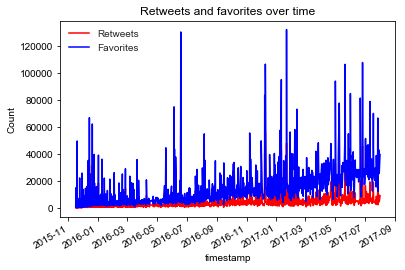

In [111]:
# 可视化favorite_count和retweet_count随时间的变化
twitter_clean['retweet_count'].plot(color = 'red', label='Retweets')
twitter_clean['favorite_count'].plot(color = 'blue', label='Favorites')
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left')
plt.xlabel('timestamp')
plt.ylabel('Count')
plt.title('Retweets and favorites over time')
plt.show()

 `结论 `：根据favorite_count和retweet_count随时间的变化的趋势图，可知随着时间的变化，人们点赞和评论都有一定的波动，点赞的波动大于评论的波动，总体来说，随着时间的变化，点赞数高于评论数。

### 2. 图像预测算法的可信度比较

In [112]:
twitter_clean.p1_conf.describe()

count    1994.000000
mean        0.593941
std         0.271954
min         0.044333
25%         0.362857
50%         0.587635
75%         0.846285
max         1.000000
Name: p1_conf, dtype: float64

In [113]:
twitter_clean.p2_conf.describe()

count    1.994000e+03
mean     1.344195e-01
std      1.006807e-01
min      1.011300e-08
25%      5.393988e-02
50%      1.174550e-01
75%      1.951377e-01
max      4.880140e-01
Name: p2_conf, dtype: float64

In [114]:
twitter_clean.p3_conf.describe()

count    1.994000e+03
mean     6.024848e-02
std      5.089067e-02
min      1.740170e-10
25%      1.619283e-02
50%      4.950530e-02
75%      9.159438e-02
max      2.734190e-01
Name: p3_conf, dtype: float64

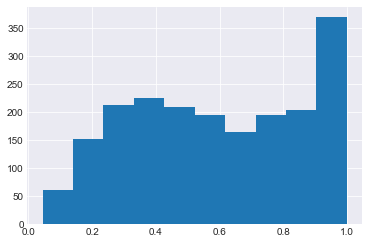

In [115]:
twitter_clean.p1_conf.hist()

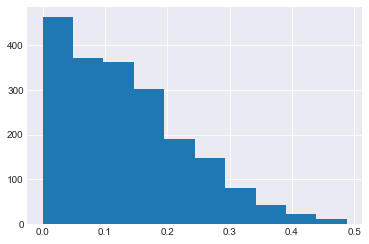

In [116]:
twitter_clean.p2_conf.hist()

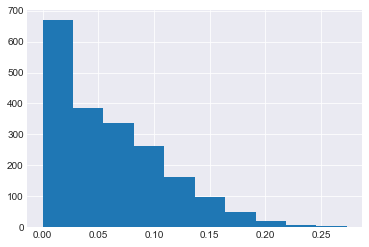

In [117]:
twitter_clean.p3_conf.hist()

 `结论 `：分析p1_conf，p2_conf，p3_conf可知1号预测的可信度 > 2号预测的可信度 > 3号预测的可信度，2号预测和3号预测的可信度均小于0.5，1号预测可信度的均值为0.59，可信度相对来说还是不高，因此图形预测算法还有很大的提升空间。

### 3. 狗狗的评价地位分析

Text(0,0.5,'Count')

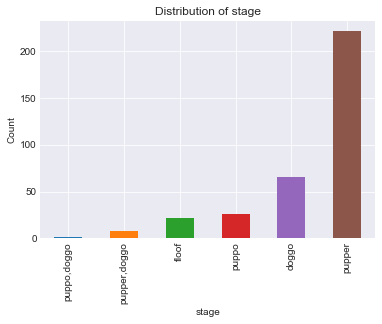

In [119]:
dog_stage = twitter_clean.groupby('stage').size()

dog_stage.sort_values().plot(kind='bar', title='Distribution of stage')
plt.ylabel('Count')

 `结论 `：由上图可知狗狗的评价地位使用最多的是pupper,其次是doggo，再次是puppo，查阅狗狗字典可知，大多数参与评价的狗狗年纪较轻。